## Problem Statement

X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

## Business Goal

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
leads_dict = pd.read_excel(r'C:\Users\NRservic\Desktop\Financial markets\Leads Data Dictionary.xlsx', header=2, index_col='Description').drop('Unnamed: 0',axis=1)

In [3]:
leads_dict

,Variables
Description,
A unique ID with which the customer is identified.,Prospect ID
A lead number assigned to each lead procured.,Lead Number
"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.",Lead Origin
"The source of the lead. Includes Google, Organic Search, Olark Chat, etc.",Lead Source
An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.,Do Not Email
An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.,Do Not Call
The target variable. Indicates whether a lead has been successfully converted or not.,Converted
The total number of visits made by the customer on the website.,TotalVisits
The total time spent by the customer on the website.,Total Time Spent on Website


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
leads = pd.read_csv(r'C:\Users\NRservic\Desktop\Financial markets\Leads.csv')

In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


#### Initial data preparation

In [8]:
len(leads)

9240

It's enough data to create our model 

In [9]:
leads['Prospect ID'].duplicated().sum()

0

There're not duplicates, in our data

In [10]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

All columns have the correct dtype.

In [11]:
leads.isna().sum().to_frame(name='Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


If column has missing values more than 3000 it is not an efficient data. We drop that columns.

In [12]:
for i in leads.columns:
    if leads[i].isna().sum()>3000:
        leads.drop(i, axis=1, inplace=True)

We check and correct each column.

1. Lead Source

In [13]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [14]:
leads['Lead Source'].fillna('Google', inplace=True)

In 'Lead Source' column, we fill missing values with the most frequent one

In [15]:
leads['Lead Source'] = leads['Lead Source'].str.replace('google', 'Google')

And also we check and correct if columns name are not written differently.

In [16]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

2. Last Activity

In [17]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

If we don't have information about last activity of leads, let's simply fill that rows with "Other"

In [18]:
leads['Last Activity'].fillna('Other', inplace=True)

3. City

In [19]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the city, and we also fill missing values with "Select".

In [20]:
leads['City'].fillna('Select', inplace=True)

4. Specialization

In [21]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the specialization, and we also fill missing values with "Select".

In [22]:
leads['Specialization'].fillna('Select', inplace=True)

5. How did you hear about X Education

In [23]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the How did you hear about X Education, and we also fill missing values with "Select".

In [24]:
leads['How did you hear about X Education'].fillna('Select', inplace=True)

6. Country

In [25]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
South Africa               4
Sweden                     3
Philippines                2
Uganda                     2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
Ghana                      2
Belgium                    2
Tanzania                   1
Russia                     1
Switzerland                1
Vietnam                    1
Sri Lanka                  1
Liberia                    1
Indonesia     

In [26]:
leads[(leads['Country'].isna())&(leads['City'].isna()==False)]['City'].unique()

array(['Select', 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Cities', 'Other Metro Cities', 'Tier II Cities'],
      dtype=object)

We check what values city column have when Country column's variables are missing.

In [27]:
leads.loc[(leads['Country'].isna())&(leads['City']=='Mumbai'), 'Country'] = 'India'
leads.loc[(leads['Country'].isna())&(leads['City']=='Other Cities of Maharashtra'), 'Country'] = 'India'
leads['Country'].fillna('unknown', inplace=True)

Mumbai and Maharashtra are in India, we can fill that missing rows with India. But for rest we will fill with "unknown".

7. What is your current occupation

In [28]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
leads['What is your current occupation'].fillna('Other', inplace=True)

8. Lead Profile

In [30]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [31]:
leads['Lead Profile'].fillna('Select', inplace=True)

9. What matters most to you in choosing a course

In [32]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
leads['What matters most to you in choosing a course'].fillna('Other', inplace=True)

10. TotalVisits

In [34]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [35]:
leads['TotalVisits'].fillna(3, inplace=True)

11. Page Views Per Visit

In [36]:
leads['Page Views Per Visit'].fillna(2, inplace=True)

Let's make all column names follow the same nameing convention

In [37]:
leads.columns = leads.columns.str.lower().str.replace(' ','_')
string_columns = list(leads.dtypes[leads.dtypes=='Object'].index)

for col in string_columns:
    leads[col] = leads[col].str.lower().str.replace(' ', '_')

Split our data into trian and test datasets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_full, test_X = train_test_split(leads, test_size=0.2, random_state=1)  

In [40]:
train_X, val_X = train_test_split(train_full, test_size=0.2, random_state=1)

In [41]:
train_y = train_X['converted'].values.reshape(-1,1)
val_y = val_X['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

In [42]:
print(f'{len(train_y)}\n{len(val_y)}\n{len(test_y)}')

5913
1479
1848


#### Explotary Data Analysis

Let's make two lists: categorical, containing names of categorical variables and numerical, containing names of numerical variables

In [43]:
categorical_df = leads.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = leads.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)

In [44]:
train_X[categorical].nunique().to_frame('nunique').sort_values('nunique', ascending=False)

,nunique
country,35
lead_source,19
specialization,19
last_activity,17
last_notable_activity,15
how_did_you_hear_about_x_education,10
city,7
lead_profile,6
what_is_your_current_occupation,6
lead_origin,5


In [45]:
train_X['converted'].value_counts()

0    3629
1    2284
Name: converted, dtype: int64

In our data, 2832 leads converted their contract and 4560 leads didn't convert. In order to find convering rate we can divide 2831 by 4560 or use mean() funtion, which will do the same thing.

In [46]:
global_mean = round(train_X['converted'].mean(),3)
print(f'Only {global_mean*100}% of leads have been successfully converted.')

Only 38.6% of leads have been successfully converted.


If we choose specific column and find converted mean, we will know converting rate of that group. We can do it by groupby function.

If difference between global converting rate and that column's converting rate is positive, it means that this group of leads convert their contracts more than general. If it's negative, they convert less than general. And if difference between the rates is the small, the value is not important when predicting converting because this group of leads is not really different from rest of leads.

Reliability = global rate / group rate. If reliability is lower than 1, the group has lower reliability. And if group reliability is around 1, it's not different from global rate. And if it's above 1, it means that it has more reability that leads will convert their contracts. 

In [47]:
grouped_train = train_X.groupby('what_is_your_current_occupation').converted.agg(['mean'])
grouped_train['diff'] = global_mean - grouped_train['mean']
grouped_train['reliability'] = grouped_train['mean']/global_mean
grouped_train

,mean,diff,reliability
what_is_your_current_occupation,,,
Businessman,0.400000,-0.014000,1.036269
Housewife,1.000000,-0.614000,2.590674
Other,0.147387,0.238613,0.381832
Student,0.377778,0.008222,0.978699
Unemployed,0.431573,-0.045573,1.118065
Working Professional,0.924107,-0.538107,2.394060


Housewife and Working Professional categories are most likely to be converted. There are sharp differences between values.

In [48]:
def converted_stat(column):
    data_group = train_X.groupby(column).converted.agg(['mean'])
    data_group['diff'] = data_group['mean'] - global_mean
    data_group['reliability'] = data_group['mean']/global_mean
    return data_group

In [49]:
converted_stat('what_matters_most_to_you_in_choosing_a_course')

,mean,diff,reliability
what_matters_most_to_you_in_choosing_a_course,,,
Better Career Prospects,0.485245,0.099245,1.257112
Other,0.143191,-0.242809,0.370961


In [50]:
converted_stat('a_free_copy_of_mastering_the_interview')

,mean,diff,reliability
a_free_copy_of_mastering_the_interview,,,
No,0.399409,0.013409,1.034738
Yes,0.357451,-0.028549,0.926040


In [51]:
converted_stat('city')

,mean,diff,reliability
city,,,
Mumbai,0.407927,0.021927,1.056804
Other Cities,0.389522,0.003522,1.009123
Other Cities of Maharashtra,0.427119,0.041119,1.106525
Other Metro Cities,0.410359,0.024359,1.063105
Select,0.343924,-0.042076,0.890996
Thane & Outskirts,0.457906,0.071906,1.186284
Tier II Cities,0.372093,-0.013907,0.963972


In [52]:
converted_stat('do_not_email')

,mean,diff,reliability
do_not_email,,,
No,0.405112,0.019112,1.049513
Yes,0.170526,-0.215474,0.441778


In [53]:
converted_stat('lead_origin')

,mean,diff,reliability
lead_origin,,,
API,0.308132,-0.077868,0.798269
Landing Page Submission,0.363375,-0.022625,0.941386
Lead Add Form,0.924211,0.538211,2.394328
Lead Import,0.181818,-0.204182,0.471032
Quick Add Form,1.000000,0.614000,2.590674


***Dependency between categorical variables and target variable***

In [54]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, leads['converted'])

data_mi = leads[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi

,Mi
what_is_your_current_occupation,0.095197
last_activity,0.088512
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
city,0.003002


***Correcaltion Coefficient***

In [55]:
leads[numerical].corrwith(leads['converted']).to_frame('Correlations')

,Correlations
totalvisits,0.029119
total_time_spent_on_website,0.362483
page_views_per_visit,-0.005068


Totalvisits and total_time_spent_on_website has positive correlation, the more leads visit website and the more time they spent on website, the more leads are converted. But page_views_per_visit	has negative correlation, the more number of pages on the website are viewed during the visits, the less they are converted.

We choose categorical variables with me score more than 0.01.

***Vectorizing variables***

In [56]:
cat = list(data_mi.iloc[0:9,:].index)

In [57]:
cat

['what_is_your_current_occupation',
 'last_activity',
 'lead_profile',
 'last_notable_activity',
 'lead_source',
 'what_matters_most_to_you_in_choosing_a_course',
 'lead_origin',
 'specialization',
 'do_not_email']

In [58]:
train_dict = train_X[cat+numerical].to_dict(orient='rows')

In [59]:
train_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'SMS Sent',
 'lead_profile': 'Select',
 'last_notable_activity': 'SMS Sent',
 'lead_source': 'Direct Traffic',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Landing Page Submission',
 'specialization': 'Supply Chain Management',
 'do_not_email': 'No',
 'totalvisits': 4.0,
 'total_time_spent_on_website': 1376,
 'page_views_per_visit': 4.0}

Column names in data frame is key and rows are values.

In [60]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [61]:
X_train = dv.transform(train_dict)
X_train[0]

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

We vectorized rows into array, to see the column names we can use get_feature_names() funtion.

In [62]:
dv.get_feature_names()

['do_not_email=No',
 'do_not_email=Yes',
 'last_activity=Approached upfront',
 'last_activity=Converted to Lead',
 'last_activity=Email Bounced',
 'last_activity=Email Link Clicked',
 'last_activity=Email Marked Spam',
 'last_activity=Email Opened',
 'last_activity=Email Received',
 'last_activity=Form Submitted on Website',
 'last_activity=Had a Phone Conversation',
 'last_activity=Olark Chat Conversation',
 'last_activity=Other',
 'last_activity=Page Visited on Website',
 'last_activity=Resubscribed to emails',
 'last_activity=SMS Sent',
 'last_activity=Unreachable',
 'last_activity=Unsubscribed',
 'last_activity=View in browser link Clicked',
 'last_notable_activity=Email Bounced',
 'last_notable_activity=Email Link Clicked',
 'last_notable_activity=Email Marked Spam',
 'last_notable_activity=Email Opened',
 'last_notable_activity=Email Received',
 'last_notable_activity=Form Submitted on Website',
 'last_notable_activity=Had a Phone Conversation',
 'last_notable_activity=Modified',

#### Logistic regression

To predict leads will be converted or not we will use logistic regression model

In [63]:
val_dict = val_X[cat+numerical].to_dict(orient='rows')
X_val = dv.transform(val_dict)

In [64]:
X_val[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

LogisticRegression(random_state=1, solver='liblinear')

In [66]:
preds = model.predict_proba(X_val)[:,1]

In [67]:
preds[:5]

array([0.03078757, 0.48039952, 0.81636696, 0.03646214, 0.94943329])

In [68]:
pred = (preds>0.5).astype(int).reshape(-1,1)

In [69]:
pred[:5]

array([[0],
       [0],
       [1],
       [0],
       [1]])

In [70]:
(pred==val_y).mean()

0.8242055442866801

We see that 82% of prediction is right.

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
thresholds = np.linspace(0,1,11)

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y, churn)
    print(f'{round(i,1)} {round(acc,3)}')

0.0 0.371
0.1 0.671
0.2 0.784
0.3 0.822
0.4 0.838
0.5 0.824
0.6 0.812
0.7 0.794
0.8 0.771
0.9 0.728
1.0 0.629


In [73]:
thresholds = np.linspace(0,1,21)
accs = []

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y, churn)
    accs.append(acc)

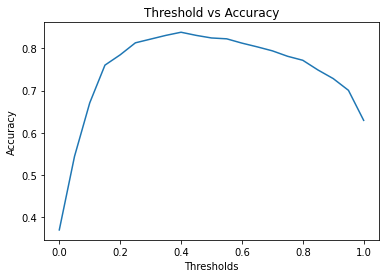

In [74]:
plt.plot(thresholds, accs)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

#### Confusion Table

In [75]:
t = 0.4

predict_convert = (preds>=t).reshape(-1,1)
predict_no_convert = (preds<t).reshape(-1,1)

actual_convert = (val_y==1)
actual_no_convert = (val_y==0)

true_positive = (predict_convert & actual_convert).sum()
true_negative = (predict_no_convert & actual_no_convert).sum()

false_positive = (predict_convert & actual_no_convert).sum()
false_negative = (predict_no_convert & actual_convert).sum()

In [76]:
confussion_table = np.array([[true_negative, false_positive],[false_negative,true_positive]])
confussion_table

array([[805, 126],
       [114, 434]])

In [77]:
confussion_table/confussion_table.sum()

array([[0.54428668, 0.0851927 ],
       [0.07707911, 0.29344151]])

#### Precision and recall

In [78]:
P = true_positive/(true_positive+false_positive)
print(f'Percent of correct predictions among leads predicted as converted is {round(P,2)*100}%')

Percent of correct predictions among leads predicted as converted is 78.0%


In [79]:
R = true_positive/(true_positive+false_negative)
print(f'Percent of correct predictions among actual converteds is {round(R,2)*100}%')

Percent of correct predictions among actual converteds is 79.0%


#### True positive rate and false positive rate

In [80]:
tpr = true_positive/(true_positive+false_negative)
fpr = false_positive/(true_negative+false_positive)
print(f'The fraction of true positives among all positive examples: {tpr}\nThe fraction of false positives among all negative examples: {fpr}')

The fraction of true positives among all positive examples: 0.791970802919708
The fraction of false positives among all negative examples: 0.13533834586466165


The fraction of true positives among all converted leads: the larger TPR is, the better, The fraction of false positives among all non-converted leads: the smaller the FPR is, the better.

In [81]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((preds>=t).reshape(-1,1)&(val_y==1)).sum()
    fp = ((preds>=t).reshape(-1,1)&(val_y==0)).sum()
    fn = ((preds<t).reshape(-1,1)&(val_y==1)).sum()
    tn = ((preds<t).reshape(-1,1)&(val_y==0)).sum()
    scores.append((t,tp,fp,fn,tn))

In [82]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['thresholds','tp','fp','fn','tn']
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,548,931,0,0
10,0.1,532,471,16,460
20,0.2,505,276,43,655
30,0.3,466,182,82,749
40,0.4,434,126,114,805
50,0.5,387,99,161,832
60,0.6,345,75,203,856
70,0.7,296,53,252,878
80,0.8,241,31,307,900
90,0.9,160,14,388,917


In [83]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,532,471,16,460,0.970803,0.505908
20,0.2,505,276,43,655,0.921533,0.296455
30,0.3,466,182,82,749,0.850365,0.195489
40,0.4,434,126,114,805,0.791971,0.135338
50,0.5,387,99,161,832,0.706204,0.106337
60,0.6,345,75,203,856,0.629562,0.080559
70,0.7,296,53,252,878,0.540146,0.056928
80,0.8,241,31,307,900,0.439781,0.033298
90,0.9,160,14,388,917,0.291971,0.015038


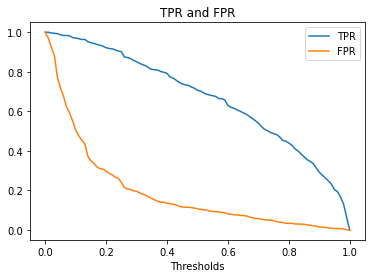

In [84]:
plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR')
plt.legend()
plt.show()

The TPR and FPR for our model evaluated at different thresholds.

#### Random baseline model

In [85]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(val_y))
y_rand = y_rand.reshape(-1,1)

In [86]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        tp = ((y_pred>=t)&(y_val==1)).sum()
        fp = ((y_pred>=t)&(y_val==0)).sum()
        fn = ((y_pred<t)&(y_val==1)).sum()
        tn = ((y_pred<t)&(y_val==0)).sum()
        scores.append((t,tp,fp,fn,tn))
        
        df_scores = pd.DataFrame(scores)
    df_scores.columns = ['thresholds','tp','fp','fn','tn']
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
    
    return df_scores

In [87]:
df_rand = tpr_fpr_dataframe(val_y, y_rand)

In [88]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,492,838,56,93,0.897810,0.900107
20,0.2,435,746,113,185,0.793796,0.801289
30,0.3,381,660,167,271,0.695255,0.708915
40,0.4,332,565,216,366,0.605839,0.606874
50,0.5,281,469,267,462,0.512774,0.503759
60,0.6,215,380,333,551,0.392336,0.408163
70,0.7,169,273,379,658,0.308394,0.293233
80,0.8,110,191,438,740,0.200730,0.205156
90,0.9,56,93,492,838,0.102190,0.099893


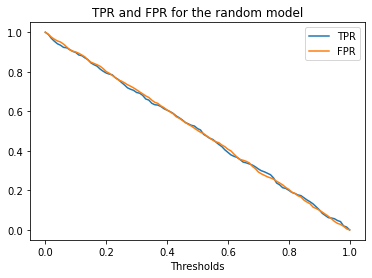

In [89]:
plt.plot(df_rand.thresholds, df_rand.tpr, label='TPR')
plt.plot(df_rand.thresholds, df_rand.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')
plt.legend()
plt.show()

#### The ideal model

In [90]:
num_neg = (val_y==0).sum()
num_pos = (val_y==1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1, num_neg+num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,548,783,0,148,1.000000,0.841031
20,0.2,548,635,0,296,1.000000,0.682062
30,0.3,548,487,0,444,1.000000,0.523093
40,0.4,548,339,0,592,1.000000,0.364125
50,0.5,548,192,0,739,1.000000,0.206230
60,0.6,548,44,0,887,1.000000,0.047261
70,0.7,444,0,104,931,0.810219,0.000000
80,0.8,296,0,252,931,0.540146,0.000000
90,0.9,148,0,400,931,0.270073,0.000000


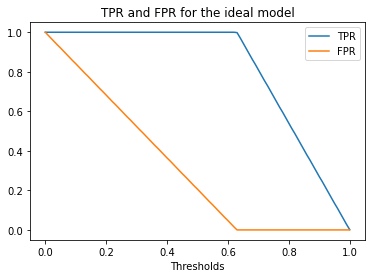

In [91]:
plt.plot(df_ideal.thresholds, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.thresholds, df_ideal.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')
plt.legend()
plt.show()

#### ROC Curve

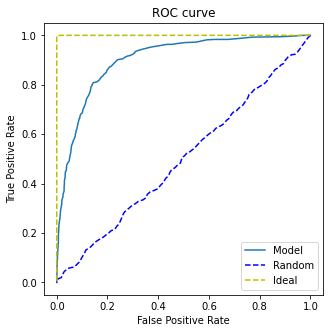

In [92]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label="Model")
plt.plot(df_rand.fpr, df_rand.tpr,'b--', label="Random")
plt.plot(df_ideal.fpr, df_ideal.tpr,'y--',label="Ideal")
plt.legend()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

The ROC curve shows the relationship between the FPR and TPR of a model.

In [93]:
from sklearn.metrics import roc_curve

In [94]:
fpr, tpr, thresholds = roc_curve(val_y, preds.reshape(-1,1))

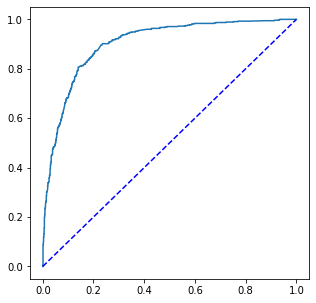

In [95]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'b--')
plt.show()

The baseline makes it easier to see how far the ROC curve of our model is from that of a random model. The top-left corner(0,1) is  the "ideal spot": the closer our models get to it, the better. 

#### Area under the ROC curve (AUC)

In [96]:
from sklearn.metrics import auc

In [97]:
auc(fpr,tpr)

0.9018871474828887

In [98]:
from sklearn.metrics import roc_auc_score

In [99]:
roc_auc_score(y_ideal, y_pred_ideal)

1.0

In [100]:
roc_auc_score(val_y, y_rand)

0.4981007001340682

We want ROC curve to be close to the ideal spot as possible and as far ffrom the random baseline as possible.

An AUC of 0.9 is indicative of a reasonably good model.

#### K-fold cross validation

In [101]:
def train(df,y):
    cate = df[cat+numerical].to_dict(orient='rows')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cate)
    
    X = dv.transform(cate)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X,y)
    
    return dv, model

In [102]:
def predict(df, dv, model):
    cate = df[cat+numerical].to_dict(orient='rows')
    
    X = dv.transform(cate)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [103]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(train_full):
    df_train = train_full.iloc[train_idx]
    df_val = train_full.iloc[val_idx]
    
    y_train = df_train['converted'].values.reshape(-1,1)
    y_val = df_val['converted'].values.reshape(-1,1)
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(round(auc,3))

In [104]:
print(aucs)
print(f'auc = {np.mean(aucs)} +- {np.std(aucs)}')

[0.89, 0.911, 0.901, 0.911, 0.901, 0.905, 0.895, 0.909, 0.905, 0.914]
auc = 0.9042 +- 0.007208328516376046


#### Finding best parametrs

In [105]:
def train(df, y, C):
    cate = df[cat+numerical].to_dict(orient='rows')
    
    dv = DictVectorizer()
    dv.fit(cate)
    
    X = dv.transform(cate)
    
    model = LogisticRegression()
    model.fit(X,y)
    
    return dv, model

In [106]:
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idx, val_idx in kfold.split(train_full):
        df_train = train_full.iloc[train_idx].reset_index(drop=True)
        df_val = train_full.iloc[val_idx].reset_index(drop=True)

        y_train = df_train['converted'].values.reshape(-1,1)
        y_val = df_val['converted'].values.reshape(-1,1)

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        aucs.append(round(auc,3))
    
    print(f'C={C} auc = {np.mean(aucs)} +- {np.std(aucs)}')

C=0.001 auc = 0.8964000000000001 +- 0.008765842800324459
C=0.01 auc = 0.8964000000000001 +- 0.008765842800324459
C=0.1 auc = 0.8964000000000001 +- 0.008765842800324459
C=0.5 auc = 0.8964000000000001 +- 0.008765842800324459
C=1 auc = 0.8964000000000001 +- 0.008765842800324459
C=10 auc = 0.8964000000000001 +- 0.008765842800324459


#### On test data

In [107]:
test_dict = test_X[cat+numerical].to_dict(orient='rows')

In [108]:
test_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Link Clicked',
 'lead_profile': 'Potential Lead',
 'last_notable_activity': 'Modified',
 'lead_source': 'Reference',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Lead Add Form',
 'specialization': 'Services Excellence',
 'do_not_email': 'No',
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

In [109]:
X_test = dv.transform(test_dict)
X_test[0]

<1x95 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [110]:
dv.get_feature_names()

['do_not_email=No',
 'do_not_email=Yes',
 'last_activity=Approached upfront',
 'last_activity=Converted to Lead',
 'last_activity=Email Bounced',
 'last_activity=Email Link Clicked',
 'last_activity=Email Marked Spam',
 'last_activity=Email Opened',
 'last_activity=Email Received',
 'last_activity=Form Submitted on Website',
 'last_activity=Had a Phone Conversation',
 'last_activity=Olark Chat Conversation',
 'last_activity=Other',
 'last_activity=Page Visited on Website',
 'last_activity=Resubscribed to emails',
 'last_activity=SMS Sent',
 'last_activity=Unreachable',
 'last_activity=Unsubscribed',
 'last_activity=View in browser link Clicked',
 'last_notable_activity=Approached upfront',
 'last_notable_activity=Email Bounced',
 'last_notable_activity=Email Link Clicked',
 'last_notable_activity=Email Marked Spam',
 'last_notable_activity=Email Opened',
 'last_notable_activity=Email Received',
 'last_notable_activity=Form Submitted on Website',
 'last_notable_activity=Had a Phone Conv

In [111]:
preds_test = model.predict_proba(X_test)

In [112]:
preds_test = preds_test[:,1]

In [113]:
preds_test[:5]

array([0.88725232, 0.91077504, 0.50947247, 0.13281372, 0.80203183])

In [114]:
pred_test =  (preds_test>0.5).astype(int).reshape(-1,1)

In [115]:
pred_test[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

In [116]:
(pred_test==test_y).mean()

0.8387445887445888

Here, there is also 84% accuray of our model.

In [117]:
t = 0.4

predict_convert_t = (preds_test>=t).reshape(-1,1)
predict_no_convert_t = (preds_test<t).reshape(-1,1)

actual_convert_t = (test_y==1)
actual_no_convert_t = (test_y==0)

true_positive_t = (predict_convert_t & actual_convert_t).sum()
true_negative_t = (predict_no_convert_t & actual_no_convert_t).sum()

false_positive_t = (predict_convert_t & actual_no_convert_t).sum()
false_negative_t = (predict_no_convert_t & actual_convert_t).sum()

In [118]:
confussion_table_t = np.array([[true_negative_t, false_positive_t],[false_negative_t,true_positive_t]])
print(f'Confussion Table:\n{confussion_table_t}')

Confussion Table:
[[949 170]
 [137 592]]


In [119]:
confussion_table_t/confussion_table_t.sum()

array([[0.51352814, 0.09199134],
       [0.0741342 , 0.32034632]])

In [120]:
P_t = true_positive_t/(true_positive_t+false_positive_t)
R_t = true_positive_t/(true_positive_t+false_negative_t)
print(f'Precision: {P_t}\nRecall: {R_t}')

Precision: 0.7769028871391076
Recall: 0.8120713305898491


In [121]:
df_scores_t = tpr_fpr_dataframe(test_y, preds_test.reshape(-1,1))
df_scores_t[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,729,1119,0,0,1.000000,1.000000
10,0.1,716,630,13,489,0.982167,0.563003
20,0.2,688,347,41,772,0.943759,0.310098
30,0.3,640,248,89,871,0.877915,0.221626
40,0.4,592,170,137,949,0.812071,0.151921
50,0.5,547,116,182,1003,0.750343,0.103664
60,0.6,488,70,241,1049,0.669410,0.062556
70,0.7,433,51,296,1068,0.593964,0.045576
80,0.8,331,21,398,1098,0.454047,0.018767
90,0.9,226,5,503,1114,0.310014,0.004468


In [122]:
fpr_t, tpr_t, thresholds_t = roc_curve(test_y, preds_test.reshape(-1,1))

In [126]:
y_train = train_full['converted'].values.reshape(-1,1)

dv, model = train(train_full, y_train, C=0.001)
y_pred = predict(test_X, dv, model)

auc = roc_auc_score(test_y, y_pred.reshape(-1,1))

print(f'auc = {auc}')

auc = 0.9145897461357695


In [127]:
def predict_single(costumer, dv, model):
    X = dv.transform([costumer])
    y_pred = model.predict_proba(X)[:,1]
    return y_pred[0]

In [140]:
costumer = dict(test_X[cat+numerical].iloc[0,:])
costumer

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Link Clicked',
 'lead_profile': 'Potential Lead',
 'last_notable_activity': 'Modified',
 'lead_source': 'Reference',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Lead Add Form',
 'specialization': 'Services Excellence',
 'do_not_email': 'No',
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

In [141]:
predict_single(costumer, dv, model)

0.8959453906284116

In [145]:
import pickle

with open('converting-model.bin', 'wb') as f_out:
    pickle.dump((dv, model),f_out)

In [146]:
with open('converting-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [147]:
prediction = predict_single(costumer, dv, model)

In [148]:
prediction

0.8959453906284116